In [79]:
import numpy as np
import pandas as pd

In [81]:
data = pd.read_csv('Books.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2049 non-null   object
 1   author          2049 non-null   object
 2   pages           2049 non-null   object
 3   genre           2049 non-null   object
 4   description     2049 non-null   object
 5   published_date  2049 non-null   object
 6   publisher       2049 non-null   object
 7   language        2049 non-null   object
 8   average_rating  2049 non-null   object
 9   ratings_count   2049 non-null   int64 
 10  thumbnail       2049 non-null   object
dtypes: int64(1), object(10)
memory usage: 176.2+ KB
None


,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
0,Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,No rating,0,http://books.google.com/books/content?id=rh-om...
1,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,No rating,0,http://books.google.com/books/content?id=P8zW2...
2,Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=pEhkh...
3,Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=FgAjF...
4,Fictional Space in the Modernist and Post-mode...,Carl Darryl Malmgren,248,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,No rating,0,http://books.google.com/books/content?id=KXzoz...


<Axes: >

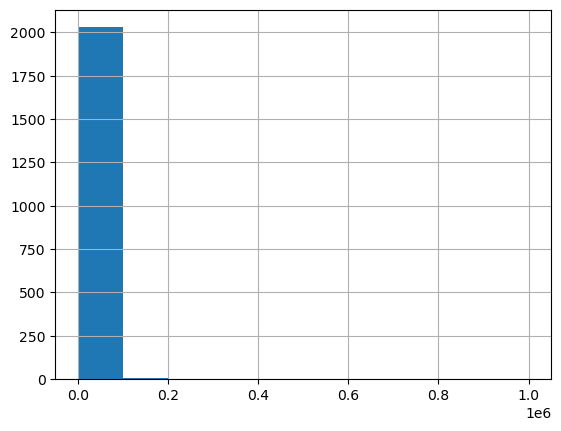

In [83]:
data['ratings_count'].hist()

In [85]:
data = data.drop(['ratings_count', 'publisher', 'average_rating', 'thumbnail'], axis=1)
data.head()

,title,author,pages,genre,description,published_date,language
0,Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,en
1,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,en
2,Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available,2004,en
3,Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available,2007,en
4,Fictional Space in the Modernist and Post-mode...,Carl Darryl Malmgren,248,Fiction,Fictional space is the imaginal expanse of fie...,1985,en


In [87]:
data['pages'] = data['pages'].replace('Unknown', 0)
data['pages'] = data['pages'].astype('int64')
data['pages'] = data['pages'].replace(0, data['pages'].mean())
data['published_date'] = [str(year).split('-')[0] for year in data['published_date']]
data.head()

,title,author,pages,genre,description,published_date,language
0,Fictional Points of View,Peter Lamarque,252.0,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,en
1,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802.0,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010,en
2,Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662.0,"Subject headings, Library of Congress",No description available,2004,en
3,Library of Congress Subject Headings,Library of Congress,1512.0,"Subject headings, Library of Congress",No description available,2007,en
4,Fictional Space in the Modernist and Post-mode...,Carl Darryl Malmgren,248.0,Fiction,Fictional space is the imaginal expanse of fie...,1985,en


<Axes: >

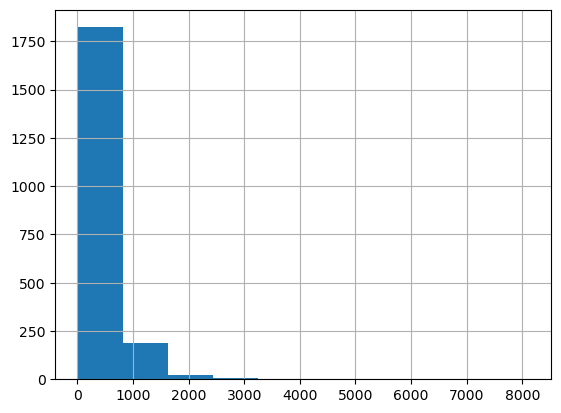

In [89]:
data['pages'].hist()

<Axes: >

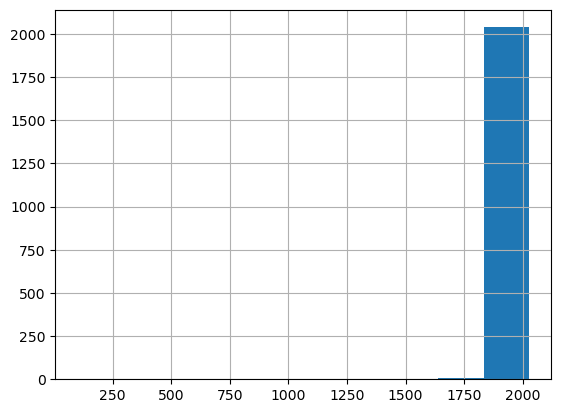

In [91]:
data['published_date'] = data['published_date'].replace(['Unknown', '19??'], 0)
data['published_date'] = data['published_date'].astype('int64')
data['published_date'] = data['published_date'].replace(0, data['published_date'].mean())
data['published_date'].hist()

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

z_page = StandardScaler()

z_date = StandardScaler()

data[['pages']] = z_page.fit_transform(data[['pages']])
data[['published_date']] = z_page.fit_transform(data[['published_date']])
data.head()

,title,author,pages,genre,description,published_date,language
0,Fictional Points of View,Peter Lamarque,-0.358469,Literary Criticism,The volume focuses on a wide range of thinkers...,0.142923,en
1,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",0.873701,Reference,"Science Fiction and Fantasy Literature, A Chec...",0.366767,en
2,Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,2.800367,"Subject headings, Library of Congress",No description available,0.270834,en
3,Library of Congress Subject Headings,Library of Congress,2.464321,"Subject headings, Library of Congress",No description available,0.318800,en
4,Fictional Space in the Modernist and Post-mode...,Carl Darryl Malmgren,-0.367431,Fiction,Fictional space is the imaginal expanse of fie...,-0.032954,en


In [95]:
langs = pd.get_dummies(data['language']).astype('int64')

data = pd.concat([data, langs], axis=1)

In [97]:
data_str_features = data['author'] + ' ' + data['genre'] + ' ' + data['description']
data_str_features

0       Peter Lamarque Literary Criticism The volume f...
1       R. Reginald, Douglas Menville, Mary A. Burgess...
2       Library of Congress. Cataloging Policy and Sup...
3       Library of Congress Subject headings, Library ...
4       Carl Darryl Malmgren Fiction Fictional space i...
                              ...                        
2044    Helaine Olen, Harold Pollack Personal Finance ...
2045    Suze Orman Personal Finance A comprehensive gu...
2046    Jack Canfield Self-Help A guide to achieving p...
2047    Suze Orman Personal Finance Combines emotional...
2048    Tonya Rapley Personal Finance A millennial-foc...
Length: 2049, dtype: object

In [99]:
vectorizer = CountVectorizer(stop_words='english', min_df=10)

data_vector = vectorizer.fit_transform(data_str_features)

data_vector = pd.DataFrame(data_vector.toarray())
data_vector

,0,1,2,3,4,5,6,7,8,9,...,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(data_vector)
cos_sim[0]

array([1.        , 0.07974522, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [103]:
def get_recommendations(name_book, cos_sim=cos_sim, num_recs=4):
    index = data.index[data['title'].str.lower() == name_book.lower()]

    book_row = cos_sim[index].ravel()
    book_row = {cos: ind for ind, cos in enumerate(book_row)}

    book_row = sorted(book_row.items(), key=lambda x: x[0], reverse=True)

    recs = book_row[1:num_recs + 1]

    name_recs = []
    for rec in recs:
        name_recs.append(data.iloc[rec[1]]['title'])

    return name_recs

In [105]:
print(get_recommendations('The Success Principles'))
print(get_recommendations('War and Conflict Quotations'))
print(get_recommendations('Decline and Fall of the Roman Empire'))
print(get_recommendations('What is a Gospel?'))
print(get_recommendations('Mystery Shopping Secrets')) 
print(get_recommendations('Internet Science'))

['The 7 Habits of Highly Effective People', 'The 4-Hour Workweek', 'The Money Manual', 'The Compound Effect']
["Clio's Laws", 'War and Popular Culture', "St James's Palace", 'Upon this Foundation']
["Clio's Laws", 'The Cambridge Companion to Fantasy Literature', 'Polybius and His Legacy', 'Historicizing the Enlightenment, Volume 2']
['Breaking Out Bales of Cotton Stored on Head', 'Life of Charles Dickens', 'A Rapid Survey of the Massachusetts Educational System', "Surgeon General's Workshop, Health Promotion and Aging"]
['Clues: A Journal of Detection, Vol. 38, No. 1 (Spring 2020)', 'Think and Grow Rich', 'The 7 Habits of Highly Effective People', 'Science and Pseudoscience in Clinical Psychology, First Edition']
['INCOLWIS 2019', 'The Role of Digital Technologies in Shaping the Post-Pandemic World', 'Contemporary Native American Cultural Issues', 'Faith and the Philosophers']
